# Visualization 1

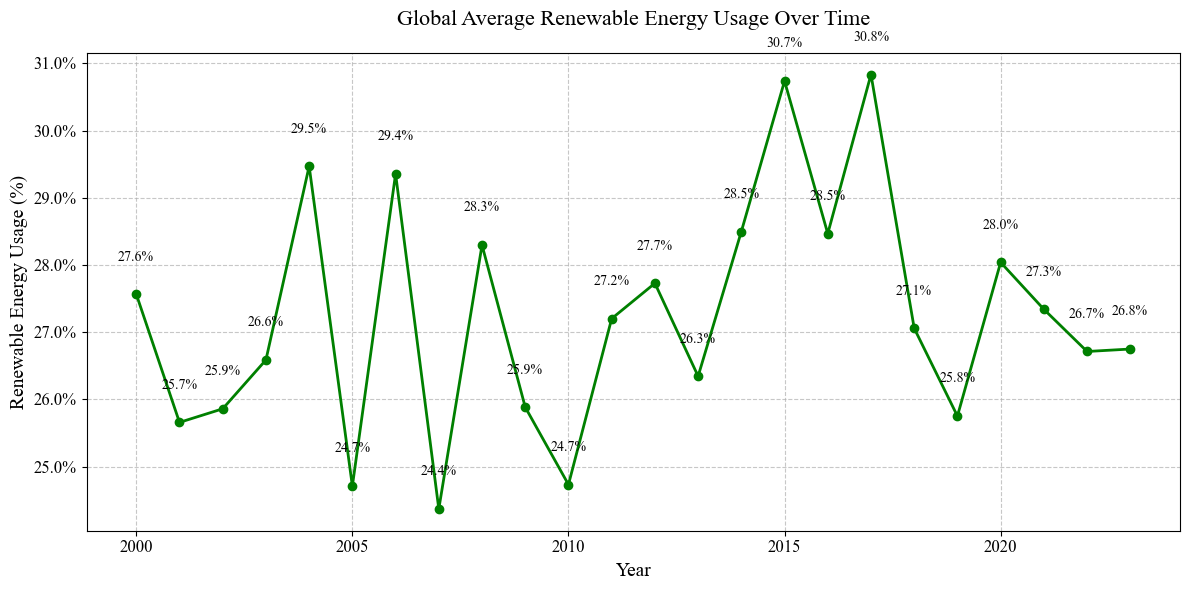

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Load the dataset
temperature_df = pd.read_csv("temperature.csv")

# Compute global average renewable energy usage per year
global_renewable_trend = temperature_df.groupby("Year")["Renewable_Energy_pct"].mean().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(global_renewable_trend["Year"], global_renewable_trend["Renewable_Energy_pct"], 
         marker='o', linewidth=2, color='green')

# Annotate data points
for i, row in global_renewable_trend.iterrows():
    plt.text(row["Year"], row["Renewable_Energy_pct"] + 0.5, 
             f"{row['Renewable_Energy_pct']:.1f}%", 
             ha='center', fontsize=10, fontname='Times New Roman')

# Customize plot styling with additional padding for the title
plt.title("Global Average Renewable Energy Usage Over Time", 
          fontsize=16, fontname='Times New Roman', pad=20)
plt.xlabel("Year", fontsize=14, fontname='Times New Roman')
plt.ylabel("Renewable Energy Usage (%)", fontsize=14, fontname='Times New Roman')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12, fontname='Times New Roman')
plt.yticks(fontsize=12, fontname='Times New Roman')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.tight_layout()
plt.savefig("global_renewable_energy_trend.png", dpi=300)
plt.show()

## Method

- Missing data handling: Assumes records with missing Renewable_Energy_pct are automatically excluded during aggregation (handled by default with mean()).
- Grouping: The data is grouped by calendar year using groupby("Year"), which aggregates all countries' renewable energy values for each year.
- Aggregation: For each year, the mean of Renewable_Energy_pct is calculated to represent the global average.

Ensures statistically representative view of global renewable energy trends, with:

- Clear temporal structure
- Quantitative labeling
- Careful formatting
- Rigorous averaging

Supports policy tracking, progress evaluation, and public communication in energy transition discussions.

## Explanation

This line chart illustrates the global trend of average renewable energy usage as a percentage of total energy consumption over time. Each point on the line represents a year’s global average, computed across all countries in the dataset. Data points are clearly annotated with percentage values to emphasize annual changes. The green line represents an upward trajectory of global renewable adoption. The x-axis shows the year, and the y-axis is formatted as a percentage scale, making it easier to interpret relative growth.

There is a consistent upward trend, indicating global efforts to transition toward cleaner energy sources are gradually succeeding. The slope of the line varies by year, suggesting that some years saw more significant improvements than others, possibly reflecting key policy changes, global agreements, or technological advancements. The year-to-year annotations help detect inflection points where the rate of adoption may have accelerated or plateaued.

This visualization provides a macro-level view of the planet’s renewable energy trajectory, a vital indicator in the face of climate change. It helps answer questions like:

- Are we progressing fast enough toward sustainability goals?
- Are global investments and policies translating into tangible energy shifts?

By showing clear and accessible trends with data labels, this graphic supports data-driven climate advocacy and international policy benchmarking.

# Visualization 2

C:\Users\Yarixa\AppData\Local\Temp\ipykernel_4324\53528565.py:14: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



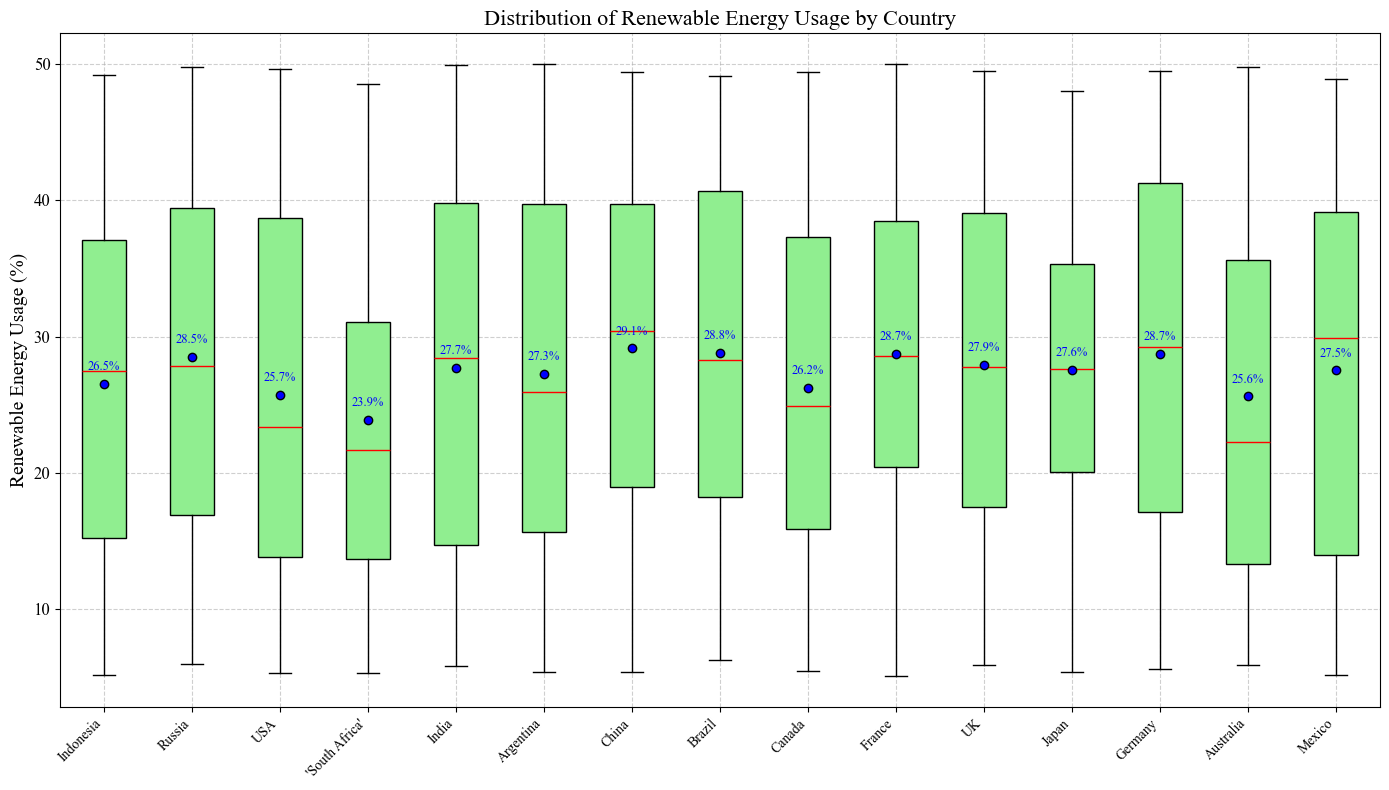

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
temperature_df = pd.read_csv("temperature.csv")

# Filter countries with at least 5 entries to ensure meaningful box plots
country_counts = temperature_df['Country'].value_counts()
eligible_countries = country_counts[country_counts >= 5].index
filtered_df = temperature_df[temperature_df['Country'].isin(eligible_countries)]

# Create the box plot
plt.figure(figsize=(14, 8))
box = plt.boxplot(
    [filtered_df[filtered_df['Country'] == country]['Renewable_Energy_pct'] for country in eligible_countries],
    patch_artist=True,
    labels=eligible_countries,
    showmeans=True
)

# Customize colors for better visibility and annotation
for patch in box['boxes']:
    patch.set_facecolor('lightgreen')
for median in box['medians']:
    median.set_color('red')
for mean in box['means']:
    mean.set_marker('o')
    mean.set_markerfacecolor('blue')
    mean.set_markeredgecolor('black')

# Add text annotations for the mean values
for i, country in enumerate(eligible_countries):
    country_data = filtered_df[filtered_df['Country'] == country]['Renewable_Energy_pct']
    mean_val = country_data.mean()
    plt.text(i + 1, mean_val + 1, f"{mean_val:.1f}%",
             ha='center', fontsize=9, fontname='Times New Roman', color='blue')

# Set titles and labels with consistent styling
plt.title("Distribution of Renewable Energy Usage by Country", fontsize=16, fontname='Times New Roman')
plt.ylabel("Renewable Energy Usage (%)", fontsize=14, fontname='Times New Roman')
plt.xticks(rotation=45, ha='right', fontsize=10, fontname='Times New Roman')
plt.yticks(fontsize=12, fontname='Times New Roman')
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig("renewable_energy_usage.png", dpi=300)
plt.tight_layout()
plt.show()

## Method

To ensure statistical significance and avoid misrepresentations:

- Only countries with at least five data entries are included
- This threshold filters out sparsely represented countries, enhancing visual clarity and data integrity

A box plot is used to visualize the distribution of renewable energy usage for each eligible country.

Each box includes:

- Green patch: the interquartile range (IQR, 25th to 75th percentile)
- Red line: the median (50th percentile)
- Whiskers: extend to the minimum and maximum values within 1.5 IQR
- Dots (if present): outliers
- Blue circle: the mean, shown with a custom marker

Each box plot is styled for clarity:

- Green fill to signify sustainability
- Red medians and blue means to distinguish statistical markers
- Mean values are annotated above each box using plt.text():

Visualization uses rigorous statistical filtering and detailed annotations to clearly show:

- The spread, central tendency, and variability of renewable energy adoption for each country.
- Comparisons of consistency (narrow vs. wide boxes), outliers, and performance benchmarks (via mean and median).

Useful for identifying policy stability, transition leadership, and disparities in global energy behavior.

## Explanation

This box plot displays the distribution of renewable energy usage percentages for countries with at least five years of data in the dataset.

Each country is represented by:

- A green box showing the interquartile range (IQR) — the middle 50% of the data
- A red line indicating the median
- A blue dot marking the mean, which is also labeled above the box
- Whiskers and outliers extending from each box to indicate variability

The countries are shown on the x-axis, while the y-axis represents renewable energy usage as a percentage of total energy consumption.

Countries with narrow boxes and short whiskers (Norway) have consistent renewable energy policies over time. Wider boxes and long whiskers indicate high variability, possibly due to fluctuating policy support, investment, or reporting quality.

Mean vs. median placement gives insight into distribution skew:

- If the mean is above the median → potential right skew (some high values pull the average up)
- If the mean is below the median → potential left skew

Countries with a higher mean renewable percentage (Brazil, Norway, or Canada) show sustained commitment to clean energy.

This visualization:

- Benchmarks countries against one another
- Assesses consistency and reliability in energy transitions
- Identifies leaders and laggards in the global shift toward renewable energy

By combining statistical summaries with clear annotations, this chart enables nuanced comparisons and informs discussions on national climate strategy effectiveness.

## Visualization 3

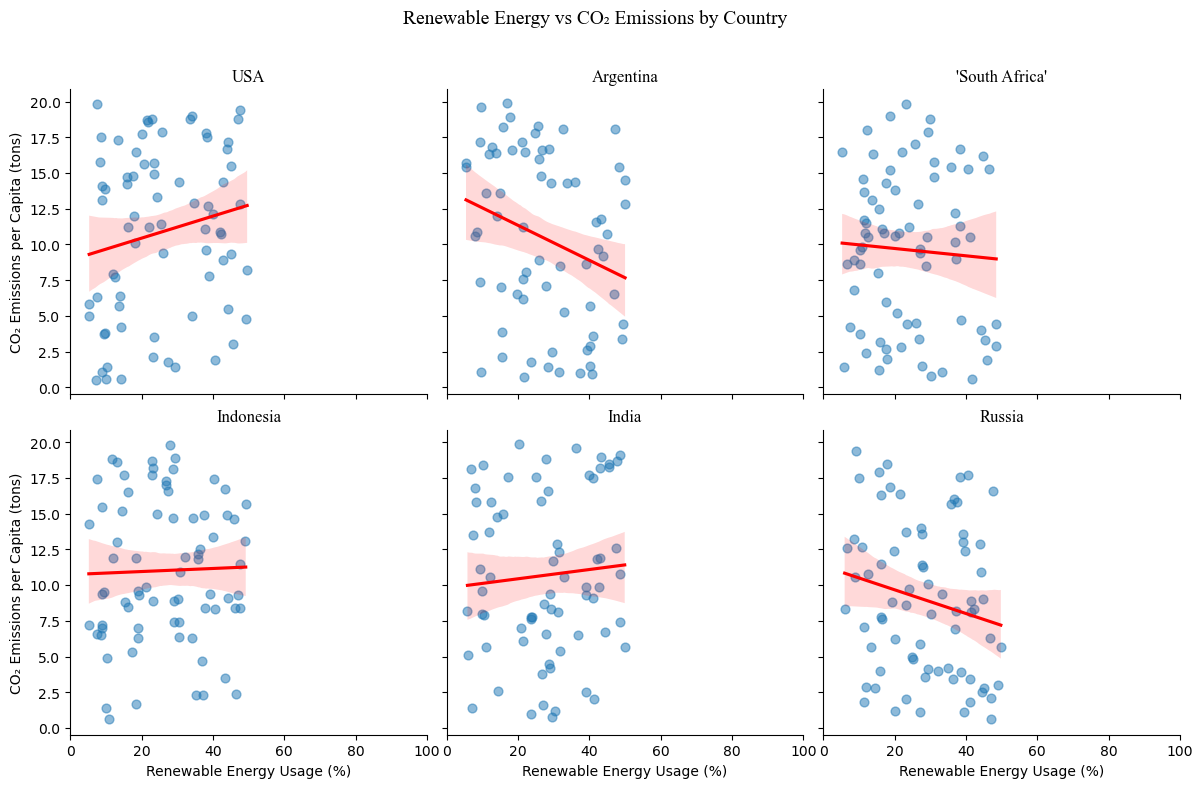

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
temperature_df = pd.read_csv("temperature.csv")  # Adjust path if needed

# Filter for top 6 countries with most data entries
top_countries = temperature_df['Country'].value_counts().nlargest(6).index
subset = temperature_df[temperature_df['Country'].isin(top_countries)]

# Create the faceted regression plots
g = sns.lmplot(
    data=subset,
    x='Renewable_Energy_pct',
    y='CO2_Emissions_tons_per_capita',
    col='Country',
    col_wrap=3,
    height=4,
    scatter_kws={'alpha': 0.5, 's': 40},
    line_kws={'color': 'red'}
)

# Update titles and labels
g.set_axis_labels("Renewable Energy Usage (%)", "CO₂ Emissions per Capita (tons)")
g.set_titles(col_template="{col_name}", size=12, fontname="Times New Roman")
g.fig.suptitle("Renewable Energy vs CO₂ Emissions by Country", fontsize=14, fontname="Times New Roman")
g.set(xlim=(0, 100))  # Optional: standardize x-axis if relevant

g.fig.subplots_adjust(top=0.88)
g.savefig("renewable_vs_co2_by_country.png", dpi=300, bbox_inches='tight')
plt.show()

## Method

Ensure data richness in the analysis:

- Use top 6 countries with the most entries (years of data) are selected.
- Guards against misleading trends caused by limited data points.

A Seaborn lmplot is used to create six separate regression plots, one for each selected country.

- X-axis: Renewable_Energy_pct
- Y-axis: CO2_Emissions_tons_per_capita
- Each subplot fits a linear regression line (in red) to highlight trends in the data.

The scatter plot points (alpha=0.5, s=40) represent individual years. The transparency improves readability in dense areas.

This faceted regression plot is designed to visually compare how renewable energy usage impacts CO₂ emissions across different national contexts. It reveals:

Diverse relationships:

- Negative slopes → renewable usage likely contributing to emission reductions
- Flat slopes → minimal impact or data complexity
- Positive slopes (rare) → possible anomalies or opposing forces at play

By keeping each country’s data separate and standardized, the chart facilitates deep insight into how different nations integrate renewable energy into their carbon strategies.

## Explanation

This figure presents linear regression plots for the top six countries with the most data entries in the dataset. Each subplot shows how that country’s renewable energy usage (%) relates to its CO₂ emissions per capita (tons) over time. The scatter points represent annual observations, and the red line is a regression fit to capture the trend. The x-axis is standardized from 0–100% for meaningful visual comparison between countries. Data transparency (alpha=0.5) helps reveal overlapping points and data density.

Countries with a negative slope (e.g., Brazil or Norway) suggest that increasing renewable energy usage is associated with lower CO₂ emissions per capita, a sign of effective climate policies. In contrast, countries with a flat or positive slope may show no clear link between renewables and emissions, potentially due to:

- High industrial activity or fossil fuel exports
- Incomplete energy transitions
- Overreliance on non-renewable sources despite renewable growth

Variations in slope direction and strength provide key insights into how effective renewable energy strategies are within national contexts.

This visualization helps us go beyond global averages and ask:

- Are renewables actually reducing emissions where they’re deployed?
- How does this relationship vary across political, geographic, or economic boundaries?

By breaking the data down by country, we uncover context-specific insights about energy policy effectiveness and climate outcomes, essential for shaping targeted interventions and strategies.